# Variable Types

A Variable is analogous to a column in table in a relational database. When running DFS, Featuretools will attempt to infer the types of variable present in your data. DFS also allows for specifying the variable types.

**It is important that datasets have appropriately defined variable types because this will allow the right primitives to be used to generate new features.**

To understand the different variable types in Featuretools, let's first look at a graph of the variables:

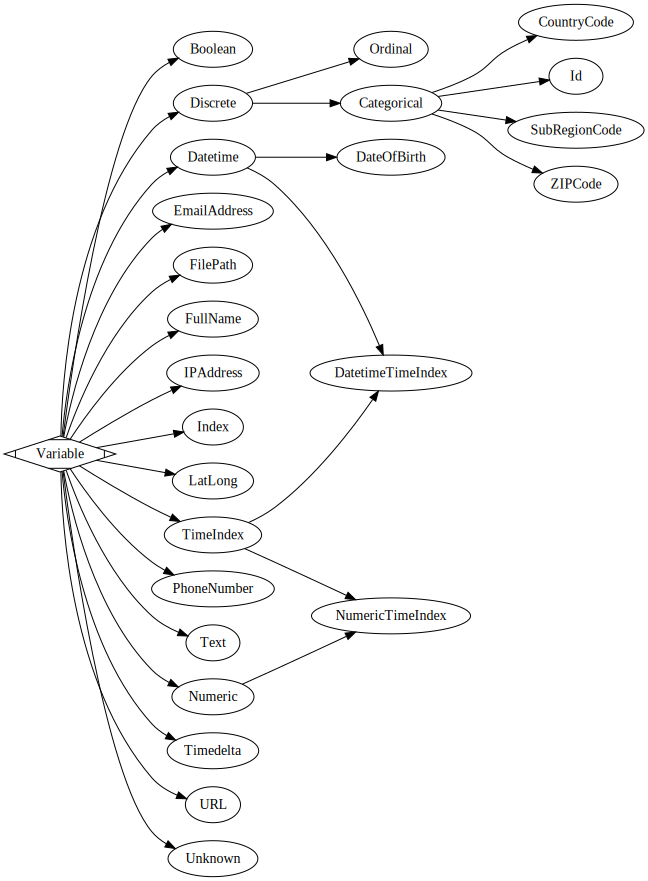

In [1]:
from featuretools.variable_types.utils import graph_variable_types
graph_variable_types()

As we can see, there are multiple variable types and some have subclassed variable types. For example, ZIPCode is variable type that is child of Categorical type which is a child of Discrete type. 

Let's explore some of the Variable Types and understand them in detail.

## Discrete

A Discrete variable type is one that can only take certain values. It is a type of data that can be counted, but cannot be measured. If can be classified into distinct buckets, then it a discrete variable type. 

There are 2 sub-variable types of Discrete. These are Categorical, and Ordinal. If the data has a certain ordering, it is of Ordinal type. If it cannot be ordered, then is a Categorical type. 

### Categorical 

A Categorical variable type is one that can take an unordered discrete values. It is usually a limited, and fixed number of possible values. Categorical variable types can be represented as strings, or integers. 

Some examples of Categorical variable types:

- Gender
- Eye Color
- Nationality
- Hair Color
- Spoken Language

### Ordinal

A Ordinal variable type is one that can take an ordered discrete values. Similar to Categorical, it is usually a limited, and fixed number of possible values. However, these discrete values have a certain order, and the ordering is important to understanding the values. Ordinal variable types can be represented as strings, or integers. 

Some examples of Ordinal variable types:

- Educational Background (Elementary, High School, Undergraduate, Graduate)

- Satisfaction Rating (“Not Satisfied”, “Satisfied", “Very Satisfied”)

- Spicy Level (Hot, Hotter, Hottest)

- Student Grade (A, B, C, D, F)

- Size (small, medium, large)


#### Categorical SubTypes (CountryCode, Id, SubRegionCode, ZIPCode)

There are also more distinctions within the Categorical variable type. These include CountryCode, Id, SubRegionCode, and ZIPCode.

It is important to make this distinction because there are certain operations that can be applied, but they don't necessary apply to all Categorical types. For example, there could be a [custom primitive](https://docs.featuretools.com/en/stable/automated_feature_engineering/primitives.html#defining-custom-primitives) that applies to the ZIPCode variable type. It could extract the first 5 digits of a ZIPCode. However, this operation is not valid for all Categorical variable types. Therefore it is approriate to use the ZIPCode variable type. 

## Datetime
A datetime is a representation of a date and/or time. Datetime variable types can be represented as strings, or integers. However, they should be in a intrepretable format or properly cast before using DFS. 

Some examples of Datetime include:

- transaction time
- flight departure time
- pickup time

### DateOfBirth
A more distinct type of datetime is a DateOfBirth. This is an important distinction because it allows additional primitives to be applied to the data to generate new features. For example, having an DateOfBirth variable type, will allow the Age primitive to be applied during dfs, and lead to a new Numeric feature.

## Text
A text is a long-form strings, that can be of any length. It is commonly used with NLP operations, such as TF-IDF. Featuretools supports NLP operations with nlp-primitives [add-on](https://innovation.alteryx.com/natural-language-processing-featuretools/). Text variable type can be represented as strings. 

## LatLong
A LatLong represents an ordered pair (Latitude, Longitude) that tells the location on Earth. The order of the tuple is important. LatLongs can be represented as floating point numbers. 

To make a latlong in a dataframe do the following:

In [2]:
import pandas as pd

data = pd.DataFrame()
data['latitude'] = [51.52, 9.93, 37.38]
data['longitude'] = [-0.17, 76.25, -122.08]
data['latlong'] = data[['latitude', 'longitude']].apply(tuple, axis=1)
data['latlong']

0      (51.52, -0.17)
1       (9.93, 76.25)
2    (37.38, -122.08)
Name: latlong, dtype: object

We can also get all the variable types as a DataFrame.

In [3]:
from featuretools.variable_types.utils import list_variable_types
list_variable_types()

,name,type_string,description
0,Unknown,unknown,None
1,Discrete,discrete,Superclass representing variables that take on...
2,Categorical,categorical,Represents variables that can take an unordere...
3,Id,id,Represents variables that identify another entity
4,ZIPCode,zip_code,Represents a postal address in the United Stat...
5,CountryCode,country_code,Represents an ISO-3166 standard country code.\...
6,SubRegionCode,sub_region_code,Represents an ISO-3166 standard sub-region cod...
7,Ordinal,ordinal,Represents variables that take on an ordered d...
8,Boolean,boolean,Represents variables that take on one of two v...
9,Numeric,numeric,Represents variables that contain numeric valu...
